<a href="https://colab.research.google.com/github/enzoampil/fastquant/blob/master/examples/backtest_news_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# uncomment to install in colab
# !pip install -e git+https://github.com/enzoampil/fastquant.git@master#egg=fastquant

## fetch stock data from yahoo finance

In [2]:
from fastquant import get_yahoo_data

#TESLA=TSLA in yahoo finance 
data = get_yahoo_data("TSLA", "2020-01-01", "2020-07-04")

[*********************100%***********************]  1 of 1 completed


## scrape news from business times website and compute sentiment

In [3]:
from fastquant import get_bt_news_sentiment

#scrape the first 3 pages of https://www.businesstimes.com.sg/search/tesla?page=1&filter=headline_en
sentiments = get_bt_news_sentiment(keyword="tesla", page_nums=3)
sentiments

100%|██████████| 3/3 [02:55<00:00, 55.83s/it]


{datetime.date(2020, 7, 13): -0.95,
 datetime.date(2020, 7, 11): 0.711,
 datetime.date(2020, 7, 10): 0.873,
 datetime.date(2020, 7, 7): 0.966,
 datetime.date(2020, 7, 4): 0.969,
 datetime.date(2020, 7, 3): 0.991,
 datetime.date(2020, 6, 28): 0.21,
 datetime.date(2020, 6, 13): -0.348,
 datetime.date(2020, 6, 12): 0.09,
 datetime.date(2020, 6, 6): 0.923,
 datetime.date(2020, 6, 5): 0.945,
 datetime.date(2020, 6, 4): 0.99,
 datetime.date(2020, 6, 3): 0.952,
 datetime.date(2020, 5, 30): 0.985,
 datetime.date(2020, 5, 20): -0.546,
 datetime.date(2020, 5, 18): -0.345,
 datetime.date(2020, 5, 16): 0.566,
 datetime.date(2020, 5, 15): -0.609,
 datetime.date(2020, 5, 14): 0.287,
 datetime.date(2020, 5, 13): -0.951,
 datetime.date(2020, 5, 9): 0.168,
 datetime.date(2020, 5, 7): 0.769,
 datetime.date(2020, 5, 3): -0.365,
 datetime.date(2020, 5, 2): -0.101,
 datetime.date(2020, 5, 1): 0.216}

## run backtest

In [5]:
import matplotlib.pyplot as pl
pl.style.use("default")

Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
===Strategy level arguments===
sentiment threshold : 0.2
2020-05-01, BUY CREATE, 755.00
2020-05-01, Cash: 100000.0
2020-05-01, Price: 755.0
2020-05-01, Buy prop size: 131
2020-05-01, Afforded size: 131
2020-05-01, Final size: 131
2020-05-04, BUY EXECUTED, Price: 755.00, Cost: 98905.00, Comm 741.79
2020-05-13, SELL CREATE, 780.00
2020-05-14, SELL EXECUTED, Price: 780.00, Cost: 98905.00, Comm 766.35
2020-05-14, OPERATION PROFIT, GROSS 3275.00, NET 1766.86
2020-05-14, BUY CREATE, 780.00
2020-05-14, Cash: 101766.86249999999
2020-05-14, Price: 780.0
2020-05-14, Buy prop size: 129
2020-05-14, Afforded size: 129
2020-05-14, Final size: 129
2020-05-15, BUY EXECUTED, Price: 780.00, Cost: 100620.00, Comm 754.65
2020-05-15, SELL CREATE, 827.78
2020-05-18, SELL EXECUTED, Price: 827.78, Cost: 100620.00, Comm 800.88
2020-05-18, OPERATION PROFIT, GROSS 6163.62, NET 4608.10
2020-06-03, BUY CR

<IPython.core.display.Javascript object>


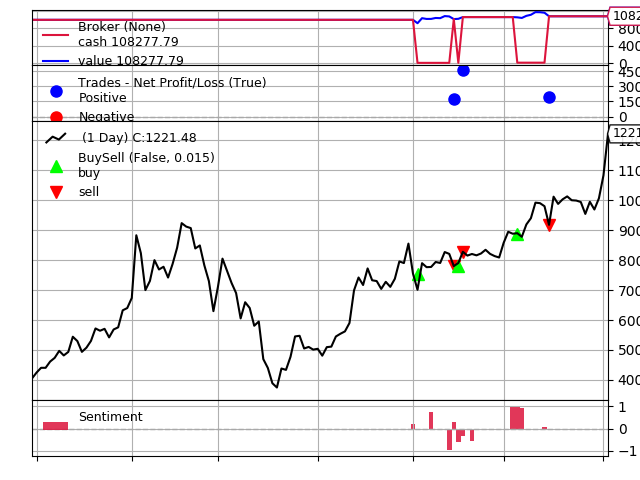

,init_cash,buy_prop,sell_prop,execution_type,senti,rtot,ravg,rnorm,rnorm100,sharperatio,pnl,final_value
0,100000,1,1,close,0.2,0.07953,0.000621,0.169498,16.949773,0.75839,8277.79,108277.786758


In [6]:
from fastquant import backtest

#initiate buy/sell if senti>0.2/senti<-0.2
backtest("sentiment", data, sentiments=sentiments, senti=0.2)